In [35]:
import pandas as pd
import matplotlib as plt
import pandas as pd
import requests
from datetime import datetime, timedelta


## hacer una dataframe con la serie de tiempo de las 10 monedas, y base de dats categorias, qeudarse solo con capitalziacion de mercado (quitar 39),  y columnas nombre, contenido, cap mercado, volumen

In [36]:
# URL de la API de CoinGecko para obtener datos de criptomonedas
api_url = 'https://api.coingecko.com/api/v3/coins/markets'

# Parámetros de la solicitud
params = {
    'vs_currency': 'usd',  # Moneda base (USD)
    'order': 'market_cap_desc',  # Ordenar por capitalización de mercado descendente
    'per_page': 10,  # Número de resultados por página
    'page': 1  # Página de resultados
}

# Realizar la solicitud HTTP a la API
response = requests.get(api_url, params=params)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en una lista de diccionarios
    data = response.json()

    # Crear un DataFrame de Pandas a partir de la lista de diccionarios
    df = pd.DataFrame(data)
    # Ahora puedes usar df para realizar análisis en los datos
    print(df.head())

    # Crear una lista con los IDs de las 10 primeras criptomonedas
    top_coins_id = [coin['id'] for coin in data]

    # Imprimir la lista de IDs
    print(top_coins_id)
else:
    print('Error al obtener los datos de la API')


            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   28550.000000   
1  https://assets.coingecko.com/coins/images/279/...    1795.310000   
2  https://assets.coingecko.com/coins/images/325/...       0.999326   
3  https://assets.coingecko.com/coins/images/825/...     230.610000   
4  https://assets.coingecko.com/coins/images/44/l...       0.590547   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  555903194728                1             599907094268   15451204782   
1  215919738045                2             215925508315    7499654623   
2   82964271049                3              82964271049   14821252811   
3   35488908505                4              46132583591     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           10 non-null     int64  
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

In [8]:
df.head(10) # ordenado por capitalización de mercado

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,28690.000000,558468524941,1,602677254900,13224096572,29222.00000,...,2.100000e+07,2.100000e+07,69045.000000,-58.42594,2021-11-10T14:24:11.849Z,67.810000,42231.71689,2013-07-06T00:00:00.000Z,None,2023-08-17T00:16:48.198Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1805.150000,216834574169,2,216834574169,5043929962,1829.85000,...,1.201391e+08,NaN,4878.260000,-62.98596,2021-11-10T14:24:19.604Z,0.432979,416927.62206,2015-10-20T00:00:00.000Z,"{'times': 83.1093931316424, 'currency': 'btc',...",2023-08-17T00:16:49.122Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.997347,82828661267,3,82828661267,19244237312,1.00100,...,8.301725e+10,NaN,1.320000,-24.51812,2018-07-24T00:00:00.000Z,0.572521,74.43853,2015-03-02T00:00:00.000Z,None,2023-08-17T00:15:00.421Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,231.680000,35631274697,4,46317647617,503875361,236.92000,...,1.538562e+08,2.000000e+08,686.310000,-66.22938,2021-05-10T07:24:17.097Z,0.039818,581977.77885,2017-10-19T00:00:00.000Z,None,2023-08-17T00:16:49.233Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.587852,31057136456,5,58773728832,1555907983,0.61355,...,9.998850e+10,1.000000e+11,3.400000,-82.69862,2018-01-07T00:00:00.000Z,0.002686,21788.80729,2014-05-22T00:00:00.000Z,None,2023-08-17T00:16:48.056Z
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.998602,26039000622,6,26039001514,4157114042,1.00200,...,2.605286e+10,NaN,1.170000,-14.80672,2019-05-08T00:40:28.300Z,0.877647,13.83475,2023-03-11T08:02:13.981Z,None,2023-08-17T00:16:51.664Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1802.880000,14686320245,7,14686320245,17722089,1828.76000,...,8.146520e+06,8.146520e+06,4829.570000,-62.64680,2021-11-10T14:40:47.256Z,482.900000,273.57911,2020-12-22T04:08:21.854Z,None,2023-08-17T00:16:50.746Z
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.273713,9592462786,8,12317322551,234884261,0.28249,...,4.500000e+10,4.500000e+10,3.090000,-91.11219,2021-09-02T06:00:10.474Z,0.019253,1325.03744,2020-03-13T02:22:55.044Z,None,2023-08-17T00:16:50.828Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.067065,9419481621,9,9419464874,535199184,0.07117,...,1.406195e+11,NaN,0.731578,-90.81441,2021-05-08T05:08:23.458Z,0.000087,77226.66826,2015-05-06T00:00:00.000Z,None,2023-08-17T00:16:53.871Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,22.860000,9301946718,10,12677416761,458349117,23.97000,...,5.551109e+08,NaN,259.960000,-91.23574,2021-11-06T21:54:35.825Z,0.500801,4449.41038,2020-05-11T19:35:23.449Z,None,2023-08-17T00:16:50.479Z


In [9]:
df.describe()


,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.00000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,5.000000e+00,10.000000,10.000000,10.000000,10.000000
mean,3255.549458,9.938594e+10,5.50000,1.082571e+11,4.497532e+09,3314.447021,3253.672154,-56.788117,-2.370773,-1.581857e+09,-2.259688,3.382857e+10,3.955364e+10,2.904583e+10,7970.881158,-64.547388,55.315579,114628.889356
std,8967.182270,1.733283e+11,3.02765,1.846306e+11,6.573424e+09,9133.692911,8963.875687,160.630270,1.818873,2.905586e+09,1.766420,4.704777e+10,5.134048e+10,4.417788e+10,21549.744399,26.998371,151.728563,207999.149636
min,0.067065,9.301947e+09,1.00000,9.419465e+09,1.772209e+07,0.071170,0.066894,-513.094085,-5.630150,-9.541611e+09,-5.512210,8.146520e+06,8.146520e+06,8.146520e+06,0.731578,-91.235740,0.000087,13.834750
25%,0.690226,1.086593e+10,3.25000,1.317964e+10,4.697307e+08,0.710413,0.684647,-19.099618,-3.358458,-9.882515e+08,-3.214600,1.285684e+08,1.285684e+08,2.100000e+07,1.762500,-88.785462,0.024394,536.443692
50%,11.929301,2.854807e+10,5.50000,3.617832e+10,1.045554e+09,12.486000,11.759067,-0.563702,-1.976240,-4.857185e+08,-1.900795,1.323008e+10,1.330399e+10,2.000000e+08,131.680000,-64.607670,0.466890,13119.108835
75%,1410.080000,7.102931e+10,7.75000,7.681493e+10,4.822226e+09,1430.800000,1408.105000,-0.005195,-1.311265,-2.722891e+08,-1.169653,4.839266e+10,7.351293e+10,4.500000e+10,3793.755000,-59.481155,0.801365,68477.930417
max,28690.000000,5.584685e+11,10.00000,6.026773e+11,1.924424e+10,29222.000000,28679.000000,-0.001410,-0.141040,7.101291e+06,0.027280,1.406198e+11,1.406195e+11,1.000000e+11,69045.000000,-14.806720,482.900000,581977.778850


In [22]:
df.isnull().sum()

id                                  0
symbol                              0
name                                0
image                               0
current_price                       0
market_cap                          0
market_cap_rank                     0
fully_diluted_valuation             0
total_volume                        0
high_24h                            0
low_24h                             0
price_change_24h                    0
price_change_percentage_24h         0
market_cap_change_24h               0
market_cap_change_percentage_24h    0
circulating_supply                  0
total_supply                        0
max_supply                          5
ath                                 0
ath_change_percentage               0
ath_date                            0
atl                                 0
atl_change_percentage               0
atl_date                            0
roi                                 9
last_updated                        0
dtype: int64

In [31]:
df.duplicated(subset=["current_price"]).sum()

0

In [32]:
df["fully_diluted_valuation"].head(10)

0    602677254900
1    216834574169
2     82828661267
3     46317647617
4     58773728832
5     26039001514
6     14686320245
7     12317322551
8      9419464874
9     12677416761
Name: fully_diluted_valuation, dtype: int64

In [37]:



columns_to_remove = [3, 6, 9,10,11,12,13,14,  19, 20, 22,23, 25]  # Índices de las columnas a eliminar

# Eliminar las columnas usando el método drop con axis=1
df = df.drop(df.columns[columns_to_remove], axis=1)

# Ahora df solo contendrá las columnas restantes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10 non-null     object 
 1   symbol                   10 non-null     object 
 2   name                     10 non-null     object 
 3   current_price            10 non-null     float64
 4   market_cap               10 non-null     int64  
 5   fully_diluted_valuation  10 non-null     int64  
 6   total_volume             10 non-null     int64  
 7   circulating_supply       10 non-null     float64
 8   total_supply             10 non-null     float64
 9   max_supply               5 non-null      float64
 10  ath                      10 non-null     float64
 11  atl                      10 non-null     float64
 12  roi                      1 non-null      object 
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ KB


In [ ]:
df

In [39]:
df.head(9)

,id,symbol,name,current_price,market_cap,fully_diluted_valuation,total_volume,circulating_supply,total_supply,max_supply,ath,atl,roi
0,bitcoin,btc,Bitcoin,28550.000000,555903194728,599907094268,15451204782,1.945962e+07,2.100000e+07,2.100000e+07,69045.000000,67.810000,None
1,ethereum,eth,Ethereum,1795.310000,215919738045,215925508315,7499654623,1.201359e+08,1.201391e+08,NaN,4878.260000,0.432979,"{'times': 83.04761719860385, 'currency': 'btc'..."
2,tether,usdt,Tether,0.999326,82964271049,82964271049,14821252811,8.301725e+10,8.301725e+10,NaN,1.320000,0.572521,None
3,binancecoin,bnb,BNB,230.610000,35488908505,46132583591,511102546,1.538562e+08,1.538562e+08,2.000000e+08,686.310000,0.039818,None
4,ripple,xrp,XRP,0.590547,31292181570,59218537315,1625307636,5.284187e+10,9.998850e+10,1.000000e+11,3.400000,0.002686,None
5,usd-coin,usdc,USD Coin,0.999418,26067312421,26064304100,4570149736,2.605586e+10,2.605286e+10,NaN,1.170000,0.877647,None
6,staked-ether,steth,Lido Staked Ether,1793.990000,14609733493,14609733493,18808449,8.146531e+06,8.146569e+06,8.146531e+06,4829.570000,482.900000,None
7,cardano,ada,Cardano,0.275262,9660309498,12404441975,246666018,3.504502e+10,4.500000e+10,4.500000e+10,3.090000,0.019253,None
8,dogecoin,doge,Dogecoin,0.067756,9538241119,9538210596,564972282,1.406205e+11,1.406201e+11,NaN,0.731578,0.000087,None


In [71]:
!pip install python 3.7
!pip install pandas ==1.3.0
!pip install pandas-profiling==3.1.1


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
ERROR: Invalid requirement: '==1.3.0'
ERROR: Ignored the following versions that require a different python version: 3.3.0 Requires-Python >=3.7, <3.11; 3.4.0 Requires-Python >=3.7, <3.11; 3.5.0 Requires-Python >=3.7, <3.11; 3.6.0 Requires-Python >=3.7, <3.11; 3.6.1 Requires-Python >=3.7, <3.11; 3.6.2 Requires-Python >=3.7, <3.11; 3.6.3 Requires-Python >=3.7, <3.11; 3.6.4 Requires-Python >=3.7, <3.11; 3.6.5 Requires-Python >=3.7, <3.11; 3.6.6 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement pandas-profiling==3.1.1 (from versions: 1.2.0.linux-x86_64, 1.0.0a1, 1.0.0a2, 1.1.0, 1.2.0, 1.3.0, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 2.0.3, 2.1.0, 2.1.2, 2.2.0, 2.3.0, 2.4.0, 2.5.0, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0rc1, 2.9.0, 2.10.0, 2.10.1, 2.11.0, 2.12.0, 2.13.0, 3.0.0, 3.1.0, 3.2.0)
ERROR: No matching distribution found 

In [14]:
!pip install pydantic-settings




In [45]:
!pip install sweetviz


In [20]:
!pip install --upgrade sweetviz


In [46]:
import sweetviz as sv

# Genera el informe sin un objetivo de comparación
report = sv.analyze(df)

# Muestra el informe en formato HTML en tu navegador
report.show_html("sweetviz_report.html")


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [ ]:

# Suponiendo que ya tienes tu DataFrame llamado df
df_precios = df.sort_values(by='current_price', ascending=False)




In [ ]:
df_precios.head(10)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,28904.000000,562377386938,1,606897478574,10377370288,29222.00000,...,2.100000e+07,2.100000e+07,69045.000000,-58.14554,2021-11-10T14:24:11.849Z,67.810000,42517.22640,2013-07-06T00:00:00.000Z,None,2023-08-16T22:57:35.130Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1811.490000,217456294251,2,217456294251,5645359498,1829.85000,...,1.201391e+08,NaN,4878.260000,-62.89034,2021-11-10T14:24:19.604Z,0.432979,418004.89804,2015-10-20T00:00:00.000Z,"{'times': 82.80019182101218, 'currency': 'btc'...",2023-08-16T22:57:28.431Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1810.120000,14727559570,7,14727626413,17451260,1828.76000,...,8.146508e+06,8.146508e+06,4829.570000,-62.53190,2021-11-10T14:40:47.256Z,482.900000,274.72817,2020-12-22T04:08:21.854Z,None,2023-08-16T22:57:33.818Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,231.980000,35669651939,4,46367534790,511669612,237.11000,...,1.538562e+08,2.000000e+08,686.310000,-66.21945,2021-05-10T07:24:17.097Z,0.039818,582149.07771,2017-10-19T00:00:00.000Z,None,2023-08-16T22:57:33.988Z
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,22.850000,9294470013,10,12668328443,484548132,23.97000,...,5.551109e+08,NaN,259.960000,-91.22561,2021-11-06T21:54:35.825Z,0.500801,4454.67053,2020-05-11T19:35:23.449Z,None,2023-08-16T22:57:28.485Z
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.000000,26053552547,6,26053552547,3200504756,1.00200,...,2.605286e+10,NaN,1.170000,-14.74306,2019-05-08T00:40:28.300Z,0.877647,13.91981,2023-03-11T08:02:13.981Z,None,2023-08-16T22:57:30.991Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999700,83084798625,3,83084798625,10747211373,1.00000,...,8.318303e+10,NaN,1.320000,-24.51296,2018-07-24T00:00:00.000Z,0.572521,74.45044,2015-03-02T00:00:00.000Z,None,2023-08-16T22:55:00.389Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.586756,30968670300,5,58606312048,1556541935,0.61355,...,9.998850e+10,1.000000e+11,3.400000,-82.76108,2018-01-07T00:00:00.000Z,0.002686,21709.78995,2014-05-22T00:00:00.000Z,None,2023-08-16T22:57:34.099Z
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.273669,9565843153,8,12283141277,233624238,0.28249,...,4.500000e+10,4.500000e+10,3.090000,-91.18231,2021-09-02T06:00:10.474Z,0.019253,1313.79454,2020-03-13T02:22:55.044Z,None,2023-08-16T22:57:29.318Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.067382,9453452094,9,9453459489,488967678,0.07117,...,1.406190e+11,NaN,0.731578,-90.79984,2021-05-08T05:08:23.458Z,0.000087,77349.34196,2015-05-06T00:00:00.000Z,None,2023-08-16T22:57:33.312Z


In [49]:

#Exploramos datos historicos en la API, por moneda
# ID de la criptomoneda en CoinGecko (por ejemplo, 'bitcoin')
crypto_id = 'bitcoin'

# Fecha de inicio (1 de enero de 2023)
start_date = datetime(2023, 1, 1)  # Cambio aquí: Utilizar datetime en lugar de date

# Fecha de fin (hasta el último día de hoy)
end_date = datetime.now()

# Convertir las fechas a formato UNIX timestamp (en segundos)
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# URL de la API de CoinGecko para obtener datos históricos en el rango de tiempo
api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

# Realizar la solicitud HTTP a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario
    data = response.json()

    # Extraer los datos de precios y fechas del diccionario
    prices = data['prices']
    timestamps = [timestamp for timestamp, _ in prices]

    # Crear un DataFrame de Pandas a partir de los datos
    df_historical = pd.DataFrame(prices, columns=['timestamp', 'price'])

    # Convertir los timestamps a fechas legibles
    df_historical['timestamp'] = pd.to_datetime(timestamps, unit='ms')

    # Ahora puedes usar df_historical para analizar los datos históricos de precios
    print(df_historical.head())
else:
    print('Error al obtener los datos históricos desde la API')


   timestamp         price
0 2023-01-02  16615.969318
1 2023-01-03  16674.342536
2 2023-01-04  16677.646186
3 2023-01-05  16855.174739
4 2023-01-06  16832.098988


In [50]:


# ID de la criptomoneda en CoinGecko (por ejemplo, 'bitcoin')
crypto_id = 'bitcoin'

# Fecha de inicio (1 de enero de 2023)
start_date = datetime(2023, 1, 1)

# Fecha de fin (hasta el último día de hoy)
end_date = datetime.now()

# Convertir las fechas a formato UNIX timestamp (en segundos)
start_timestamp = int(start_date.timestamp())
end_timestamp = int(end_date.timestamp())

# URL de la API de CoinGecko para obtener datos históricos en el rango de tiempo
api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

# Realizar la solicitud HTTP a la API
response = requests.get(api_url)

# Verificar si la solicitud fue exitosa (código 200)
if response.status_code == 200:
    # Convertir la respuesta JSON en un diccionario
    data = response.json()

    # Extraer los datos de precios, fechas y otros valores del diccionario
    prices = data['prices']
    timestamps = [timestamp for timestamp, _ in prices]
    market_caps = data['market_caps']
    total_volumes = data['total_volumes']

    # Crear un DataFrame de Pandas a partir de los datos
    df_historical = pd.DataFrame({
        'timestamp': pd.to_datetime(timestamps, unit='ms'),
        'price': [price for _, price in prices],
        'market_cap': [cap for _, cap in market_caps],
        'total_volume': [volume for _, volume in total_volumes]
    })

    # Ahora puedes usar df_historical para analizar los datos históricos de la criptomoneda
    print(df_historical.head())
else:
    print('Error al obtener los datos históricos desde la API')


   timestamp         price    market_cap  total_volume
0 2023-01-02  16615.969318  3.198320e+11  9.799253e+09
1 2023-01-03  16674.342536  3.214865e+11  1.302386e+10
2 2023-01-04  16677.646186  3.210808e+11  1.536717e+10
3 2023-01-05  16855.174739  3.243976e+11  2.083656e+10
4 2023-01-06  16832.098988  3.241390e+11  1.491904e+10


In [51]:

# Lista de los ID de las 10 principales criptomonedas
top_coins_ids = [
    'bitcoin', 'ethereum', 'cardano', 'binancecoin', 'solana',
    'ripple', 'polkadot', 'dogecoin', 'avalanche-2', 'shiba-inu'
]

# Función para obtener datos históricos de una moneda
def get_historical_data(crypto_id):
    start_date = datetime(2023, 1, 1)
    end_date = datetime.now()

    start_timestamp = int(start_date.timestamp())
    end_timestamp = int(end_date.timestamp())

    api_url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range?vs_currency=usd&from={start_timestamp}&to={end_timestamp}'

    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()

        prices = data['prices']
        timestamps = [timestamp for timestamp, _ in prices]
        market_caps = data['market_caps']
        total_volumes = data['total_volumes']

        df_historical = pd.DataFrame({
            'timestamp': pd.to_datetime(timestamps, unit='ms'),
            'price': [price for _, price in prices],
            'market_cap': [cap for _, cap in market_caps],
            'total_volume': [volume for _, volume in total_volumes]
        })

        return df_historical
    else:
        print(f'Error al obtener los datos históricos para {crypto_id}')
        return None

# Crear un diccionario para almacenar los DataFrames de cada moneda
dataframes_by_coin = {}

# Iterar a través de los IDs de moneda y obtener los datos históricos
for coin_id in top_coins_ids:
    dataframe = get_historical_data(coin_id)
    if dataframe is not None:
        dataframes_by_coin[coin_id] = dataframe


Error al obtener los datos históricos para shiba-inu


In [ ]:
dataframes_by_coin["ethereum"]

,timestamp,price,market_cap,total_volume
0,2023-01-02,1200.659217,1.447122e+11,2.179799e+09
1,2023-01-03,1214.378946,1.464431e+11,3.845096e+09
2,2023-01-04,1214.760969,1.464224e+11,3.385567e+09
3,2023-01-05,1256.436604,1.513229e+11,6.727208e+09
4,2023-01-06,1250.792252,1.508052e+11,4.052352e+09
...,...,...,...,...
222,2023-08-12,1847.541835,2.220194e+11,3.694817e+09
223,2023-08-13,1848.505239,2.220698e+11,2.215987e+09
224,2023-08-14,1839.512810,2.209483e+11,3.642425e+09
225,2023-08-15,1843.513391,2.215642e+11,4.495325e+09


In [ ]:
# Imprimir el encabezado de los DataFrames generados de las top 10
for coin_id, dataframe in dataframes_by_coin.items():
    print(f"DataFrame para {coin_id}:")
    print(dataframe.head())
    print()

DataFrame para bitcoin:
   timestamp         price    market_cap  total_volume
0 2023-01-02  16615.969318  3.198320e+11  9.799253e+09
1 2023-01-03  16674.342536  3.214865e+11  1.302386e+10
2 2023-01-04  16677.646186  3.210808e+11  1.536717e+10
3 2023-01-05  16855.174739  3.243976e+11  2.083656e+10
4 2023-01-06  16832.098988  3.241390e+11  1.491904e+10

DataFrame para ethereum:
   timestamp        price    market_cap  total_volume
0 2023-01-02  1200.659217  1.447122e+11  2.179799e+09
1 2023-01-03  1214.378946  1.464431e+11  3.845096e+09
2 2023-01-04  1214.760969  1.464224e+11  3.385567e+09
3 2023-01-05  1256.436604  1.513229e+11  6.727208e+09
4 2023-01-06  1250.792252  1.508052e+11  4.052352e+09

DataFrame para cardano:
   timestamp     price    market_cap  total_volume
0 2023-01-02  0.249938  8.760815e+09  1.180081e+08
1 2023-01-03  0.253948  8.909442e+09  1.664676e+08
2 2023-01-04  0.253144  8.866077e+09  1.584291e+08
3 2023-01-05  0.267948  9.386328e+09  3.084448e+08
4 2023-01-06  0.

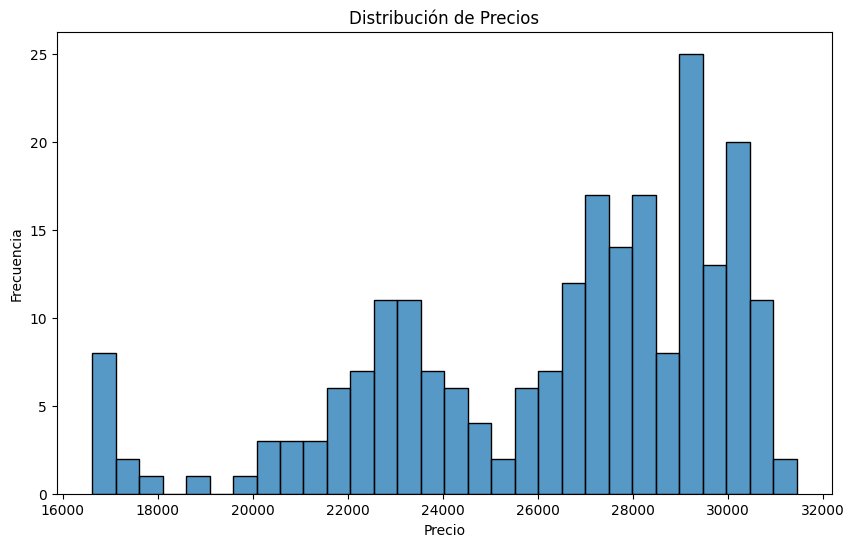

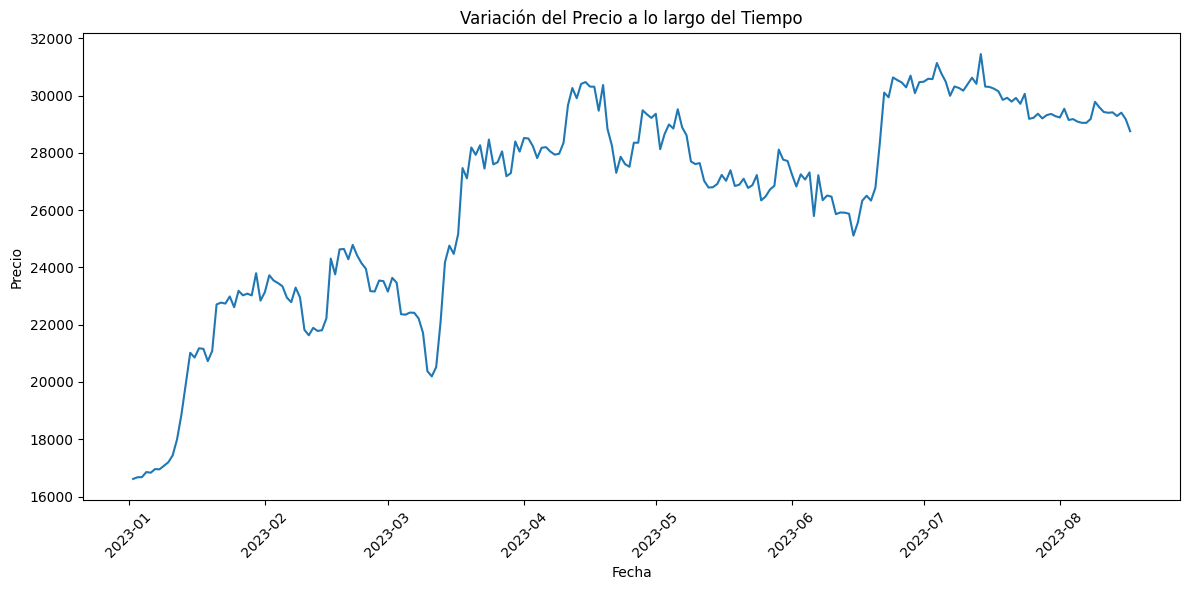

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(dataframes_by_coin["bitcoin"]["price"], bins=30)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

 #Gráfico de correlación
#plt.figure(figsize=(10, 6))
#correlation_matrix = dataframes_by_coin["bitcoin"]["price"].corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Matriz de Correlación')
#plt.show()

# Gráfico de línea de precios a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(dataframes_by_coin["bitcoin"]["timestamp"], dataframes_by_coin["bitcoin"]["price"])
plt.title('Variación del Precio a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#luego tengo qeu acceder a cada dataframe x sepadado par ahcer analisis

In [61]:

# Obtener categorias

api_url = 'https://api.coingecko.com/api/v3/coins/categories'
    
    
response = requests.get(api_url, params=params)

if response.status_code == 200:
        data = response.json()
        # Crear un DataFrame de Pandas a partir de la lista de diccionarios
df_categorias = pd.DataFrame(data)
    # Ahora puedes usar df para realizar análisis en los datos
df_categorias.head(30)

    

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),8.557376e+11,-2.038407,,[https://assets.coingecko.com/coins/images/1/s...,2.696758e+10,2023-08-17T02:05:26.836Z
1,smart-contract-platform,Smart Contract Platform,3.291304e+11,-2.195357,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,1.187737e+10,2023-08-17T02:05:06.667Z
2,stablecoins,Stablecoins,1.244711e+11,-0.117573,,[https://assets.coingecko.com/coins/images/325...,3.561819e+10,2023-08-17T02:05:06.379Z
3,alleged-sec-securities,Alleged SEC Securities,8.787479e+10,-2.596895,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,6.049757e+09,2023-08-17T02:05:02.971Z
4,exchange-based-tokens,Exchange-based Tokens,5.656679e+10,-3.101207,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,1.376689e+09,2023-08-17T02:05:08.927Z
5,centralized-exchange-token-cex,Centralized Exchange (CEX),4.809729e+10,-2.530790,These utility tokens are issued by a centraliz...,[https://assets.coingecko.com/coins/images/825...,6.698522e+08,2023-08-17T02:05:24.214Z
6,decentralized-finance-defi,Decentralized Finance (DeFi),4.590247e+10,-3.112763,,[https://assets.coingecko.com/coins/images/134...,3.800222e+10,2023-08-17T02:05:17.056Z
7,liquid-staking-tokens,Liquid Staking Tokens,1.699895e+10,-1.594832,,[https://assets.coingecko.com/coins/images/134...,4.640963e+07,2023-08-17T02:05:32.381Z
8,meme-token,Meme,1.639435e+10,-6.062765,"Meme coins derive their relevance from memes, ...",[https://assets.coingecko.com/coins/images/5/s...,1.174507e+09,2023-08-17T02:05:28.393Z
9,eth-2-0-staking,Eth 2.0 Staking,1.489857e+10,-1.375100,"In Ethereum 2.0, the consensus algorithm is tr...",[https://assets.coingecko.com/coins/images/134...,4.205324e+07,2023-08-17T02:05:26.530Z


In [66]:
df_categorias.tail()

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
110,aave-tokens,Aave Tokens,0.0,0.0,None,[https://assets.coingecko.com/coins/images/116...,4.057573e+10,2023-08-17T02:05:10.332Z
111,linea-ecosystem,Linea Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/297...,NaN,None
112,mantle-ecosystem,Mantle Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/325...,NaN,None
113,base-ecosystem,Base Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/995...,NaN,2023-07-31T06:41:01.295Z
114,tenet-ecosystem,Tenet Ecosystem,NaN,NaN,,[https://assets.coingecko.com/coins/images/301...,NaN,None


In [67]:

df_categorias.isnull().sum()

id                        0
name                      0
market_cap               39
market_cap_change_24h    39
content                  17
top_3_coins               0
volume_24h               39
updated_at                3
dtype: int64

In [65]:

# Almacenar el resultado del conteo en una variable
conteo_valores = df_categorias["id"].count()
print("Cantidad de valores no nulos en la columna 'id':", conteo_valores)

Cantidad de valores no nulos en la columna 'id': 115


In [ ]:
#parecen interesantes columnas name(cambiar nombre), market cap de la categoria,  content, updated at.

In [ ]:
df_categorias["content"]

0                                                       
1      Smart contract platforms are usually blockchai...
2                                                       
3      Tokens and cryptocurrencies alleged to be secu...
4      These tokens are normally associated with both...
                             ...                        
110                                                 None
111                                                     
112                                                     
113                                                     
114                                                     
Name: content, Length: 115, dtype: object

In [ ]:
#ver en la api como surge la aegoria de cada moneda

In [ ]:
#ver mas datos en la api para explorar 

In [ ]:


url = "https://api.coingecko.com/api/v3/global"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_global = pd.DataFrame([data["data"]])
    
    # Imprime los datos globales
    print("Datos Globales:")
    print("Total de criptomonedas:", data["data"]["active_cryptocurrencies"])
    print("Total de mercados:", data["data"]["markets"])
    print("BTC Dominancia:", data["data"]["market_cap_percentage"]["btc"], "%")
    print("Volumen total 24h:", data["data"]["total_volume"]["usd"], "USD")
    print("Capitalización total:", data["data"]["total_market_cap"]["usd"], "USD")
else:
    print("Error al obtener los datos. Código de estado:", response.status_code)


Datos Globales:
Total de criptomonedas: 10064
Total de mercados: 813
BTC Dominancia: 47.43205385434665 %
Volumen total 24h: 41916493521.15242 USD
Capitalización total: 1185891822796.7424 USD


In [ ]:
df_global.head()

,active_cryptocurrencies,upcoming_icos,ongoing_icos,ended_icos,markets,total_market_cap,total_volume,market_cap_percentage,market_cap_change_percentage_24h_usd,updated_at
0,10064,0,49,3376,813,"{'btc': 41026066.683688335, 'eth': 655024534.9...","{'btc': 1450106.0090705543, 'eth': 23152475.75...","{'btc': 47.43205385434665, 'eth': 18.336941916...",-1.542975,1692226239


In [ ]:
#traer api dolar blue, precios, o de cripto ya, para ver distintos dolares y exhchanges locales

In [ ]:
url = "https://api.coingecko.com/api/v3/exchanges"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_exchanges = pd.DataFrame(data)
    print(df_exchanges)
else:
    print("Error en la solicitud a la API")


                      id                  name  year_established  \
0                binance               Binance            2017.0   
1             bybit_spot                 Bybit            2018.0   
2                   gdax     Coinbase Exchange            2012.0   
3                  huobi                 Huobi            2013.0   
4                 kraken                Kraken            2011.0   
..                   ...                   ...               ...   
95             sushiswap             Sushiswap            2020.0   
96               bitazza               Bitazza            2021.0   
97              dodo_bsc            DODO (BSC)            2021.0   
98  velodrome-finance-v2  Velodrome Finance v2               NaN   
99              finexbox              FinexBox            2018.0   

                   country                                        description  \
0           Cayman Islands                                                      
1   British Virgin Is

In [ ]:
df_exchanges.head(10)

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10,1,249033.423998,146946.756149
1,bybit_spot,Bybit,2018.0,British Virgin Islands,Bybit is a cryptocurrency exchange that offers...,https://www.bybit.com,https://assets.coingecko.com/markets/images/69...,False,10,2,34663.016304,34663.016304
2,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10,3,34245.256420,34245.256420
3,huobi,Huobi,2013.0,Seychelles,,https://www.huobi.com,https://assets.coingecko.com/markets/images/25...,False,10,4,22620.206098,22127.298079
4,kraken,Kraken,2011.0,United States,,https://r.kraken.com/c/2223866/687155/10583,https://assets.coingecko.com/markets/images/29...,False,10,5,18703.063022,14662.556325
5,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,False,10,6,13197.972175,13197.972175
6,bitfinex,Bitfinex,2012.0,British Virgin Islands,,https://www.bitfinex.com,https://assets.coingecko.com/markets/images/4/...,False,10,7,3781.968698,2448.837418
7,binance_us,Binance US,2019.0,United States,,https://www.binance.us/,https://assets.coingecko.com/markets/images/46...,False,10,8,335.363167,335.363167
8,okex,OKX,2017.0,Seychelles,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,False,9,9,32769.732934,32769.732934
9,gate,Gate.io,NaN,Cayman Islands,"Gate was established in 2013, and it is the to...",https://gate.io/,https://assets.coingecko.com/markets/images/60...,False,9,10,18442.746281,18442.746281


In [ ]:

#Empresas que cotizan en bolsa que tienen criptomonedas entre sus activos

url = "https://api.coingecko.com/api/v3/companies/public_treasury/bitcoin"


response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Crear un DataFrame a partir de los datos
    df_bolsa = pd.DataFrame(data)
    print(df_exchanges)
else:
    print("Error en la solicitud a la API")


                      id                  name  year_established  \
0                binance               Binance            2017.0   
1             bybit_spot                 Bybit            2018.0   
2                   gdax     Coinbase Exchange            2012.0   
3                  huobi                 Huobi            2013.0   
4                 kraken                Kraken            2011.0   
..                   ...                   ...               ...   
95             sushiswap             Sushiswap            2020.0   
96               bitazza               Bitazza            2021.0   
97              dodo_bsc            DODO (BSC)            2021.0   
98  velodrome-finance-v2  Velodrome Finance v2               NaN   
99              finexbox              FinexBox            2018.0   

                   country                                        description  \
0           Cayman Islands                                                      
1   British Virgin Is

In [ ]:
df_bolsa.head() # ver como traer los datos de companies,,, ver arriba algun ej similar

,total_holdings,total_value_usd,market_cap_dominance,companies
0,232549.7158,6.721213e+09,1.2,"{'name': 'MicroStrategy Inc.', 'symbol': 'NASD..."
1,232549.7158,6.721213e+09,1.2,"{'name': 'Marathon Digital Holdings', 'symbol'..."
2,232549.7158,6.721213e+09,1.2,"{'name': 'Galaxy Digital Holdings', 'symbol': ..."
3,232549.7158,6.721213e+09,1.2,"{'name': 'Coinbase Global, Inc', 'symbol': 'NA..."
4,232549.7158,6.721213e+09,1.2,"{'name': 'Tesla, Inc.', 'symbol': 'NASDAQ:TSLA..."
